In [1]:
from IPython.display import Image

## `torchrun`/`python -m torch.distributed.run`

- `test.py`

    ```
    import os
    print('LOCAL_RANK', os.getenv('LOCAL_RANK', '0'))
    print('WORLD_SIZE', os.getenv('WORKER_SIZE', '1'))
    ```
- `torchrun --nproc_per_node 2 test.py`（双卡 gpu）
- 输出
    ```
    LOCAL_RANK 1
    WORLD_SIZE 1        # 第二张卡
    LOCAL_RANK 0
    WORLD_SIZE 1        # 第一张卡
    ```

## DDP

- scattering inputs and gathering outputs.

```
# 单机八卡
torchrun --standalone --nproc_per_node=8 train.py ...
```

## 模型并行

- forward 函数内的，数据拷贝（如从 cuda:0 到 cuda:1）可能会成为性能瓶颈；

## 环境变量配置

### `CUDA_VISIBLE_DEVICES`

- Setting `CUDA_VISIBLE_DEVICES=1` mean your script will only see one GPU which is GPU 1. 
However, inside your script it will be **cuda:0** and **not cuda:1**. Because it only see one GPU and its **index start at 0**.
- For example if you do: CUDA_VISIBLE_DEVICES=2,4,5, your script will see 3 GPUs with index 0, 1 and 2.


In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
import torch
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'
a = torch.Tensor(1).to('cuda:0')
a = torch.Tensor(1).to('cuda:1')

RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## 单机多卡 => 多机多卡

- torchrun ==> slurm（集群管理，cluster）
- 英伟达，单机多卡服务器，DGX

### local_rank => global_rank

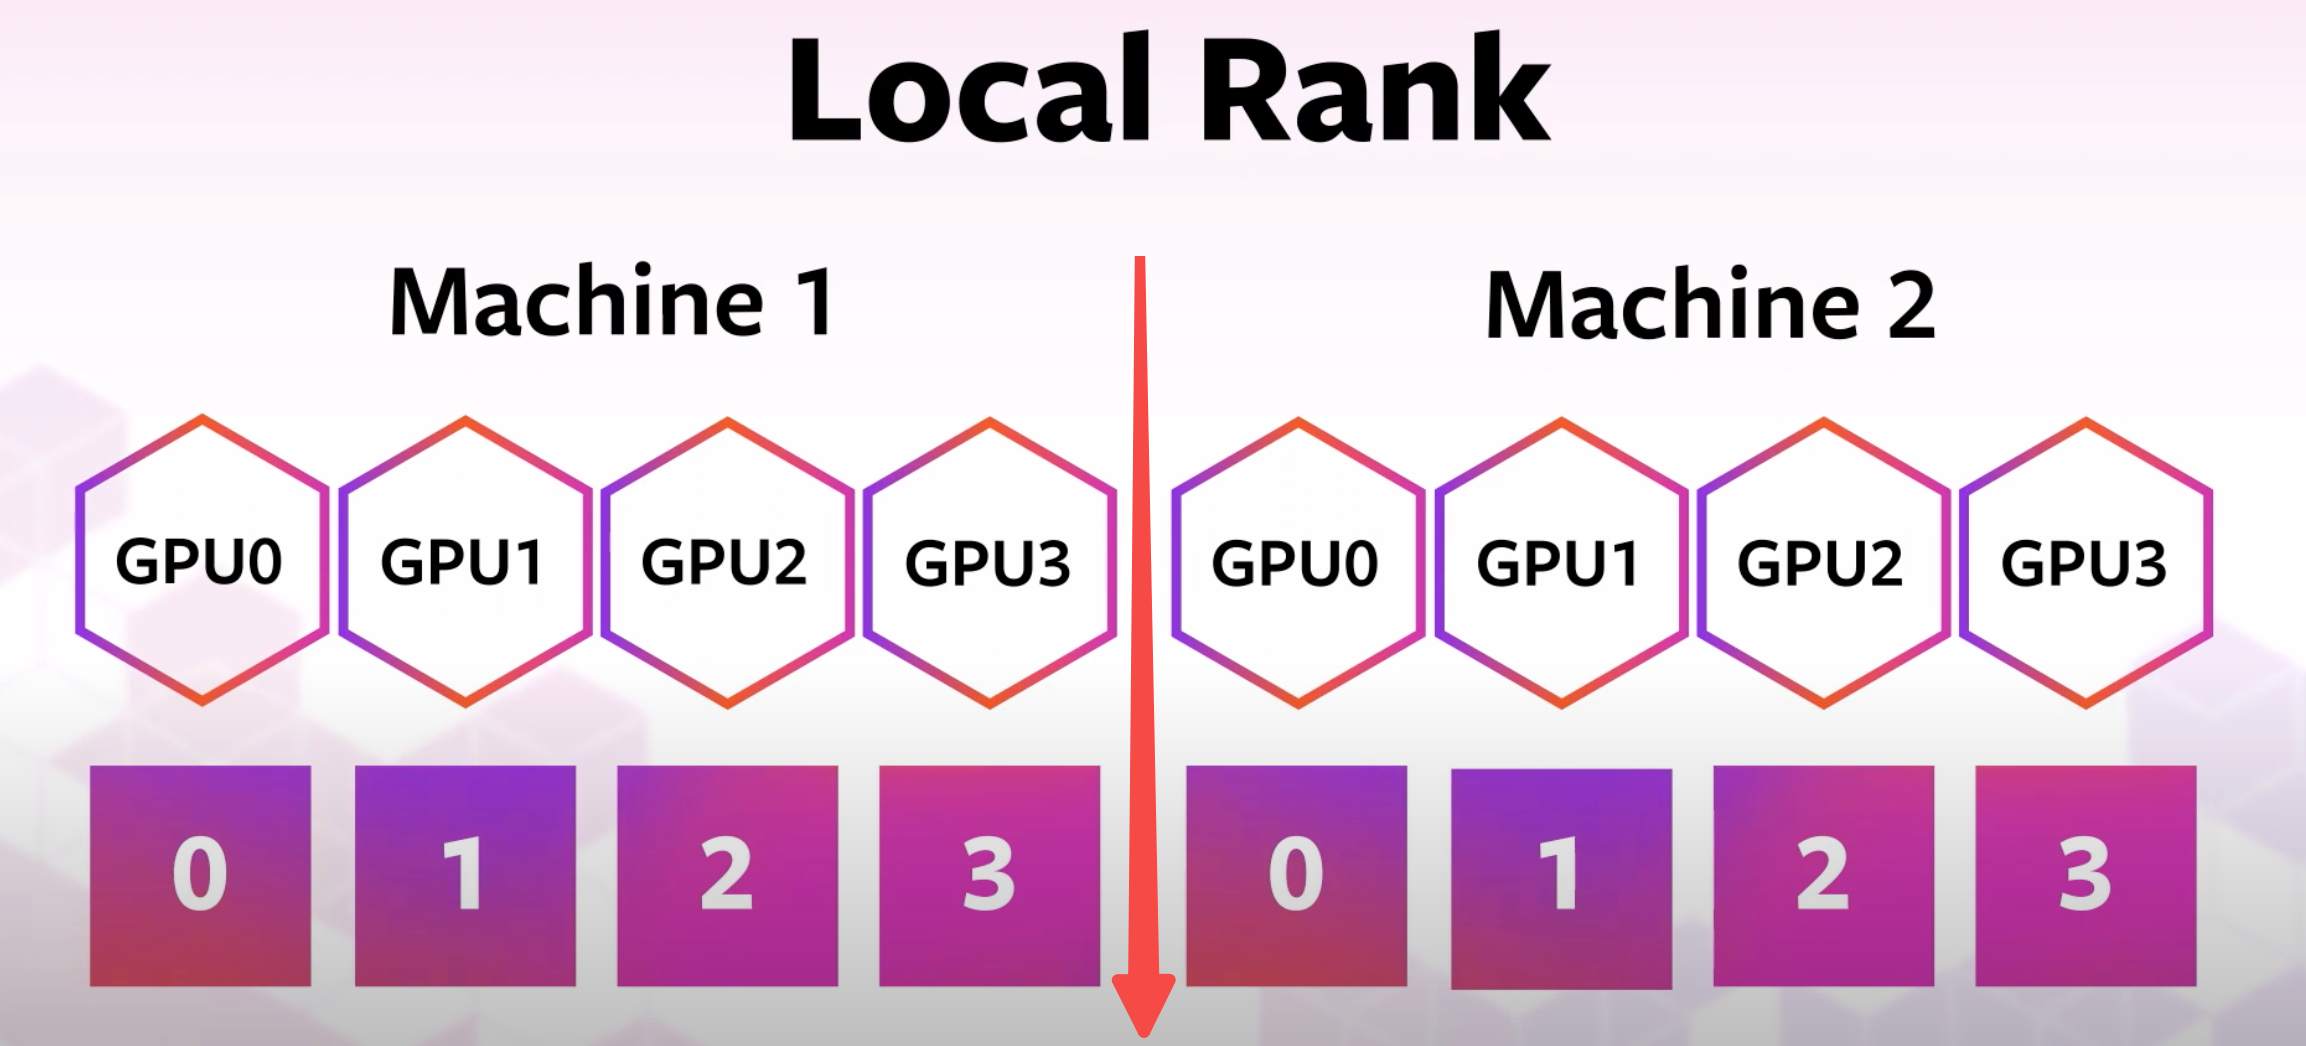

In [3]:
Image('../imgs/local_rank.png', width=400)

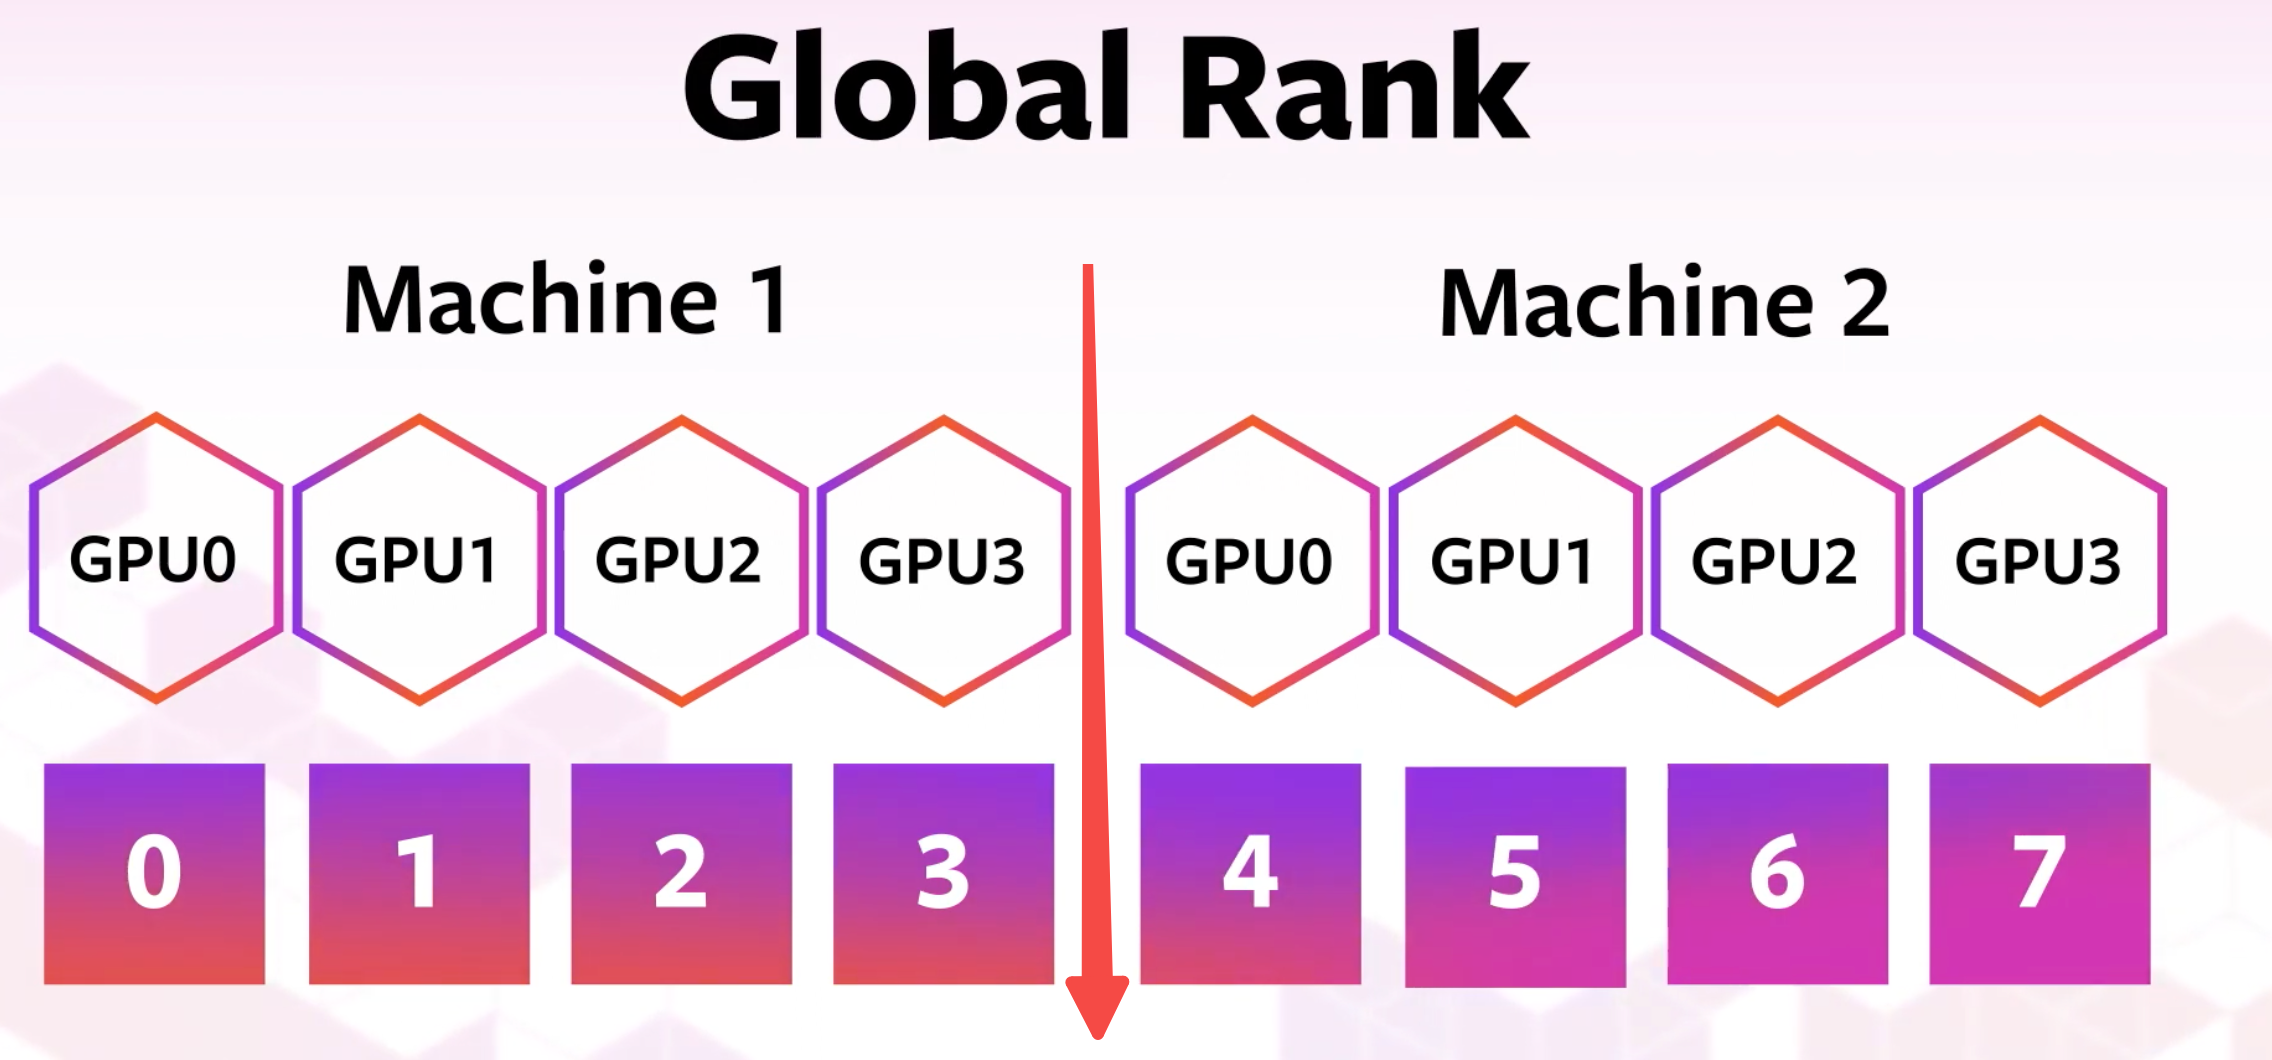

In [4]:
Image('../imgs/global_rank.png', width=400)

```
# 节点内识别
self.local_rank = int(os.environ['LOCAL_RANK'])

# 全局识别
self.global_rank = int(os.environ['RANK'])
```

### torchrun nodes

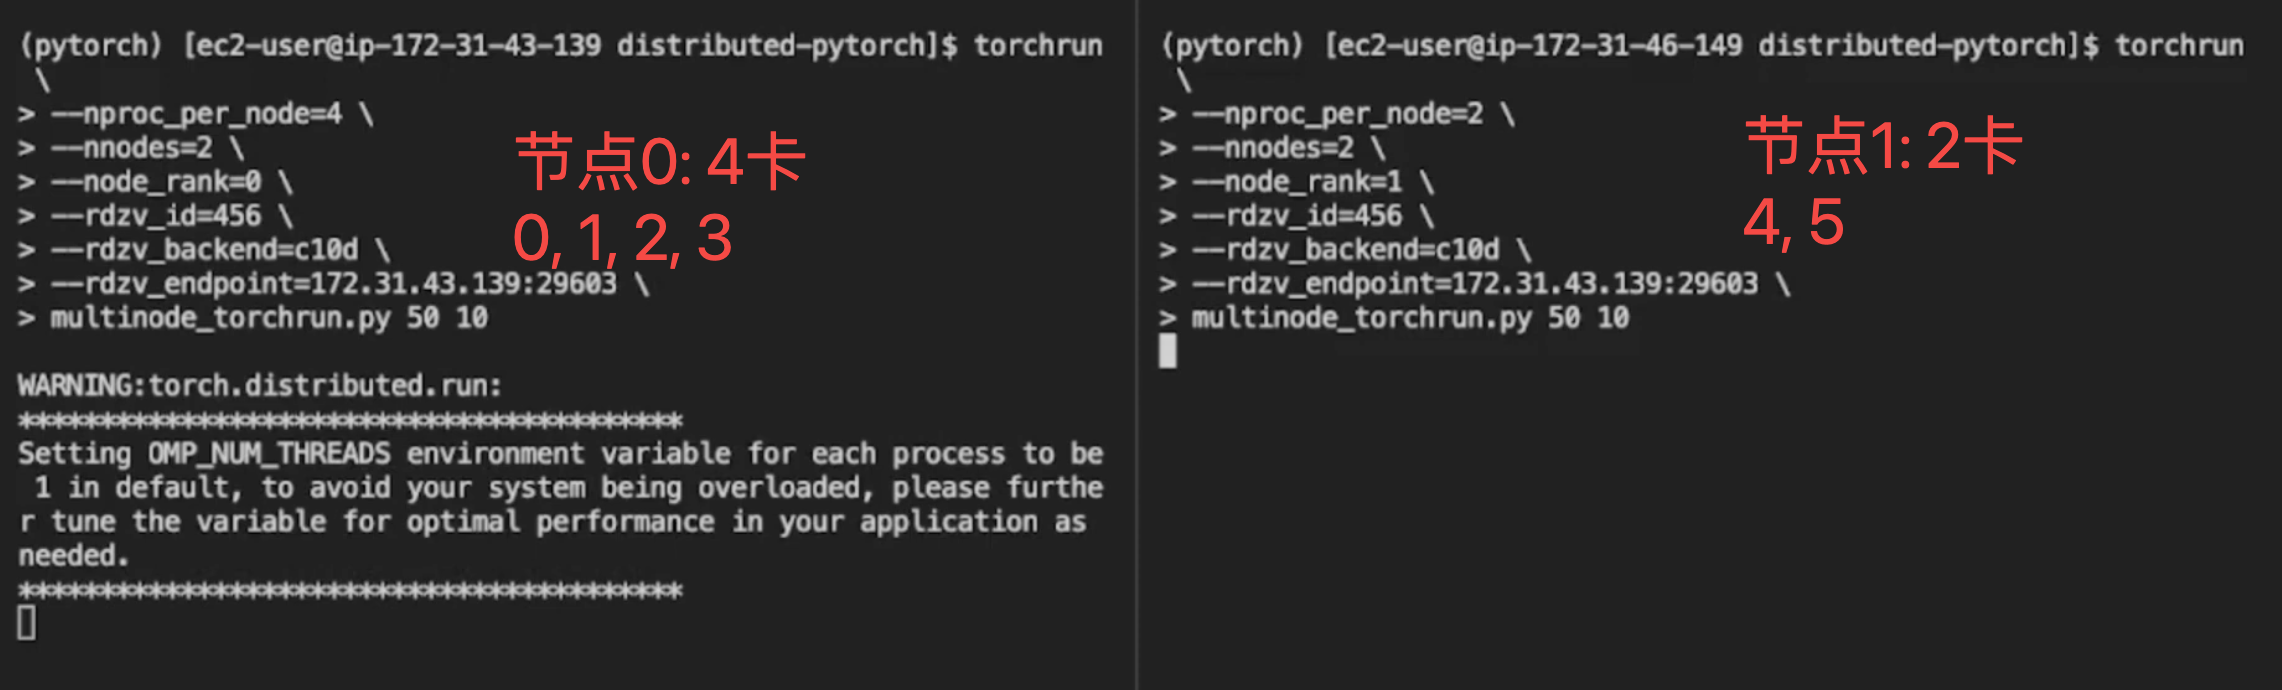

In [8]:
Image('../imgs/torchrun_nodes.png', width=600)

### 问题排查

- 机器间通信是否ok；
- `export NCCL_DEBUG=INFO`

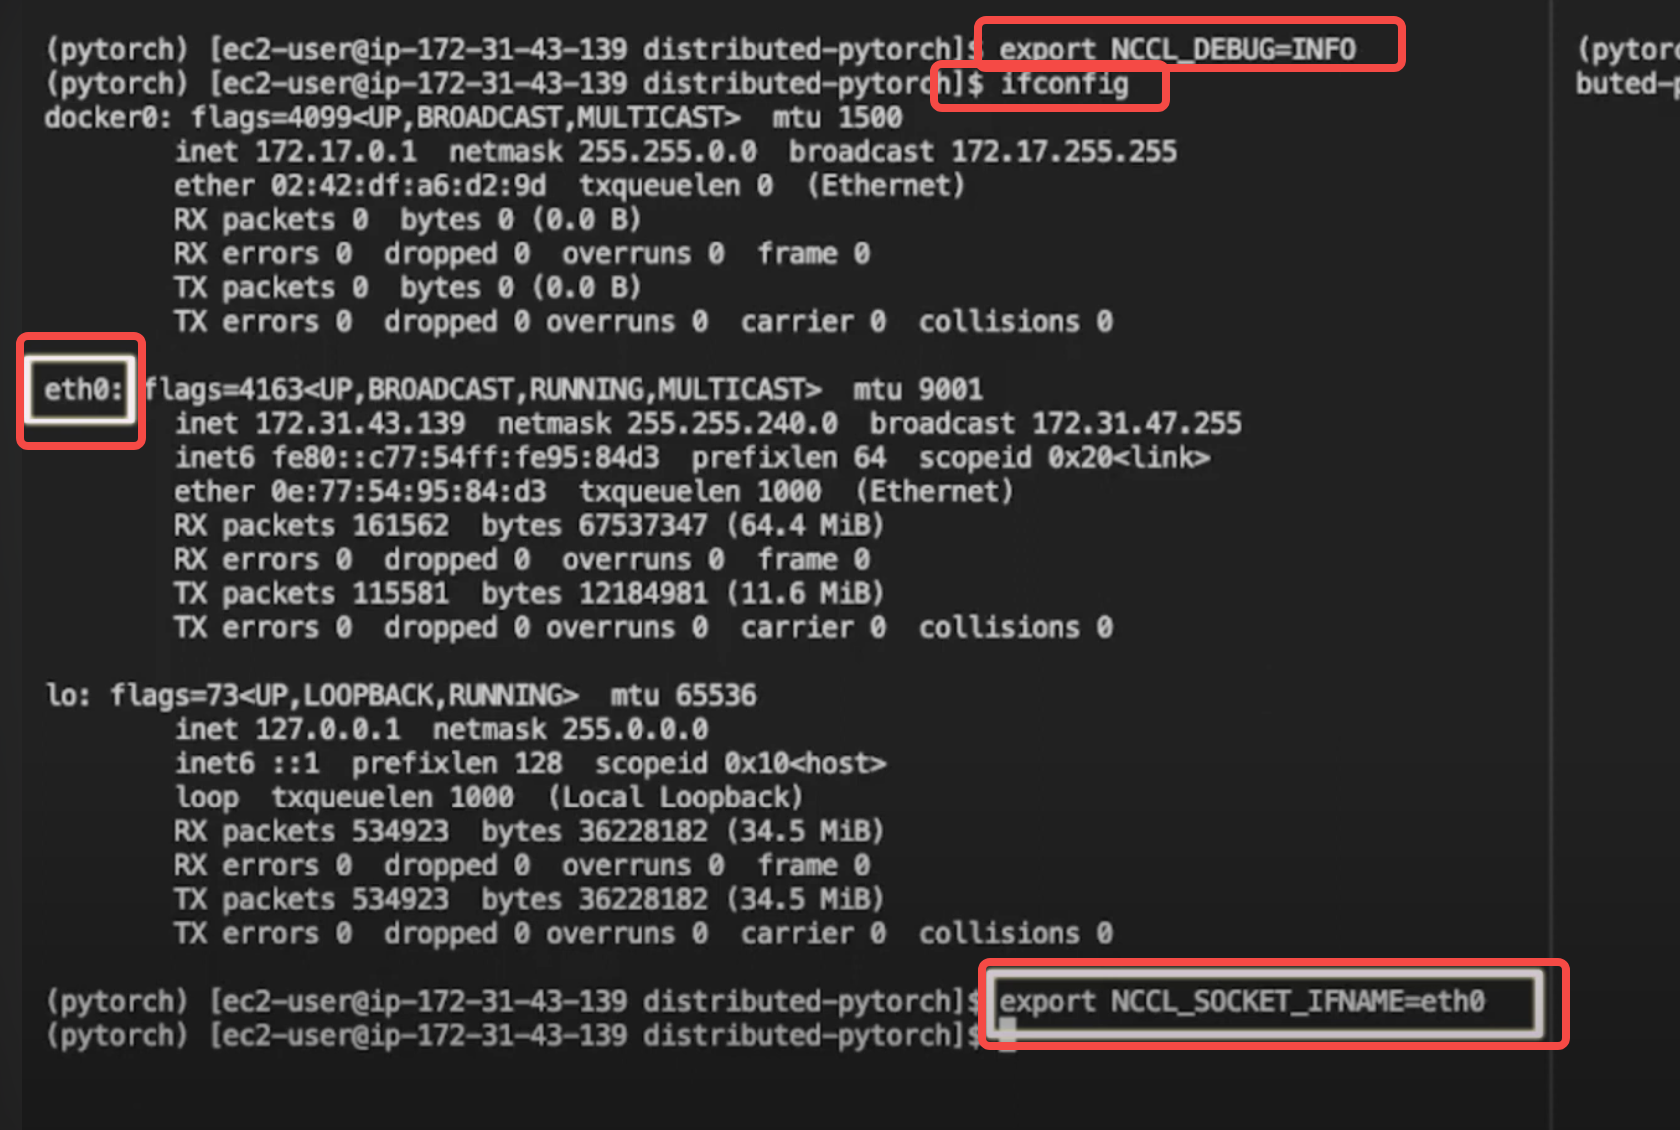

In [10]:
Image('../imgs/verbose.png', width=600)